In [1]:
!pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import path
path.setPathLocalNotebook()

from diffuserslib import loginHuggingFace, DiffusersPipelines

loginHuggingFace('token')

diffusers = DiffusersPipelines(device = "mps", safety_checker=False)
diffusers.createTextToImagePipeline()

# First-time "warmup" pass because of issue with m1 cpu: https://github.com/huggingface/diffusers/issues/372
_, _ = diffusers.textToImage(prompt="", negprompt="", steps=5, scale=7, width=512, height=512)



Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /Users/rob/.huggingface/token
Login successful
Creating text to image pipeline from model runwayml/stable-diffusion-v1-5


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

cpu


100%|██████████| 20/20 [01:27<00:00,  4.36s/it]


Seed: 2101123409


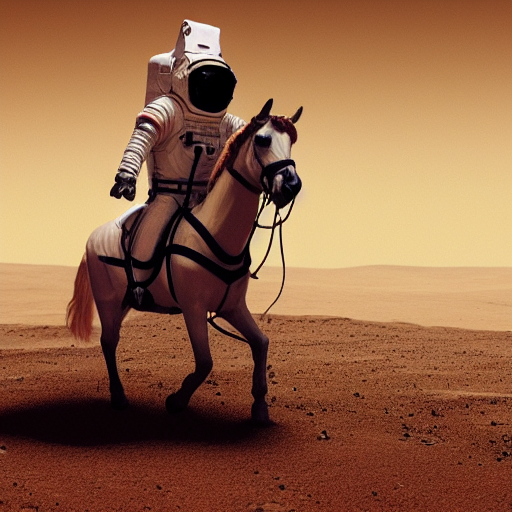

In [10]:
from IPython.display import display

prompt = "a photo of an astronaut riding a horse on mars"

image, seed = diffusers.textToImage(prompt=prompt, negprompt="", steps=20, scale=7, width=512, height=512, scheduler="EulerDiscreteScheduler", seed=2101123409)

print(f"Seed: {seed}")
display(image)


In [22]:
import re


def findBetween(text, start, end, includetags=False):
    regex = f"\{start}.*?\{end}"
    token = re.search(regex, text)
    if token is not None:
        if includetags:
            return token.group()
        else:
            return token.group()[1:-1]
    else:
        return None




print(findBetween('<poppy>_embed_object_poppy2_1000.bin', '<', '>', True))



<poppy>
